epsilon=8.9 r=0.2

In [1]:
import math  
import meep as mp
from meep import mpb

/home/311514090/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/311514090/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/311514090/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/311514090/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


簡述  
===========
每個參數對應的 Modesolver 都有預設值，故使用時只需修改想改變的參數即可。  
1. 參數 num_bands 控制每個k點計算多少條帶，預設值為1，因預設值太小，將其改為8  
2. 計算波段的 k 點（Bloch wavevectors）。這裡由參數 k_points 控制，它是一個最初為空的 3 向量列表。將它設置在方格的irreducible Brillouin zone的角上，$\Gamma$、X、M 和 $\Gamma$，形成重複週期。  
3. 我們還需要計算許多中間 k 點的能帶，以便我們看到連續能帶結構，因此可以可以調用 pymeep 提供的函數 interpolate 來為我們插入它們，而不是手動指定所有這些中間點。example為在兩個連續點中線性插入新的四個點。由print可知已成功獲得16個點。  
4. 程式中所有的空間向量都是長度標準化的晶格方向上制定，k 個點是根據（未歸一化的）倒易晶格向量指定的。在這種情況下，我們不必指定晶格方向，





In [2]:
num_bands = 8

In [3]:
k_points = [mp.Vector3(),           
            mp.Vector3(0.5),        
            mp.Vector3(0.5,0.5),    
            mp.Vector3()]           
                                    

In [4]:
k_points = mp.interpolate(4, k_points)

In [5]:
print(k_points)

[Vector3<0.0, 0.0, 0.0>, Vector3<0.1, 0.0, 0.0>, Vector3<0.2, 0.0, 0.0>, Vector3<0.30000000000000004, 0.0, 0.0>, Vector3<0.4, 0.0, 0.0>, Vector3<0.5, 0.0, 0.0>, Vector3<0.5, 0.1, 0.0>, Vector3<0.5, 0.2, 0.0>, Vector3<0.5, 0.30000000000000004, 0.0>, Vector3<0.5, 0.4, 0.0>, Vector3<0.5, 0.5, 0.0>, Vector3<0.4, 0.4, 0.0>, Vector3<0.3, 0.3, 0.0>, Vector3<0.19999999999999996, 0.19999999999999996, 0.0>, Vector3<0.09999999999999998, 0.09999999999999998, 0.0>, Vector3<0.0, 0.0, 0.0>]


設置系統的幾何形狀
------
* 以原點為中心建立晶格的最小單位。   
* 此架構建立棒狀方形晶格。    
* 此架構　半徑0.2，沿軸的長度無窮大(z方向)    
* 由於幾何結構為三維，但現在要計算二維模擬，所以用geometry_lattice參數來控制，在計算單元的大小時，調整meep.Lattice，使某個維度大小設置成0，用此方式來降低維度。  


In [6]:
geometry = [mp.Cylinder(0.2, material=mp.Medium(epsilon=8.9))]

In [7]:
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1))

模擬
---
* 定義了一個 1x1 的二維單元格（默認為正方形）。該單元根據resolution參數離散化，默認為 10（像素/點陣單位），在此改成32。這樣就會形成32x32 的計算網格。(習慣上用2的冪次方倍較佳，)  
* 計算能帶結構最簡單的方式為 ms.run() ，但由於這是一個二維計算，因此將波段分成 TE 和 TM 偏振模式，藉由調整ms.run_te()和ms.run_tm()來完成

In [8]:
resolution = 32

In [9]:
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution)

In [10]:
#%%capture
ms.run_tm()
tm_freqs = ms.all_freqs
tm_gaps  = ms.gap_list
ms.run_te()
te_freqs = ms.all_freqs
te_gaps  = ms.gap_list


Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.1, 0.0, 0.0>
  Vector3<0.2, 0.0, 0.0>
  Vector3<0.30000000000000004, 0.0, 0.0>
  Vector3<0.4, 0.0, 0.0>
  Vector3<0.5, 0.0, 0.0>
  Vector3<0.5, 0.1, 0.0>
  Vector3<0.5, 0.2, 0.0>
  Vector3<0.5, 0.30000000000000004, 0.0>
  Vector3<0.5, 0.4, 0.0>
  Vector3<0.5, 0.5, 0.0>
  Vector3<0.4, 0.

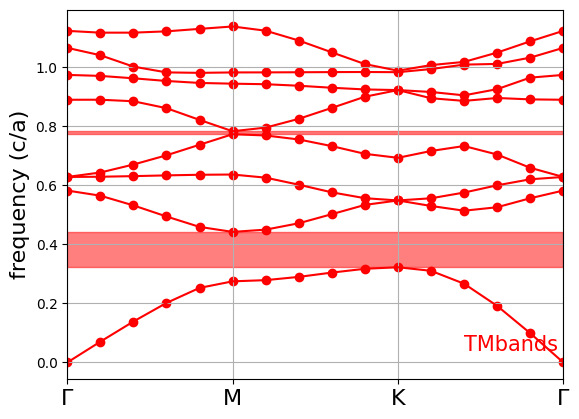

In [11]:
import matplotlib.pyplot as plt
import numpy as np 


fig, ax = plt.subplots()
x = range(len(tm_freqs))

for xz, tmz in zip(x, tm_freqs):
    ax.scatter([xz]*len(tmz), tmz, color='red')

ax.plot(tm_freqs, color='red')
#ax.set_ylim([0, 1])
ax.set_xlim([x[0], x[-1]])


for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.5)
        
ax.text(12, 0.04, 'TMbands', color='red', size=15)

points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'M', 'K', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)

plt.show()

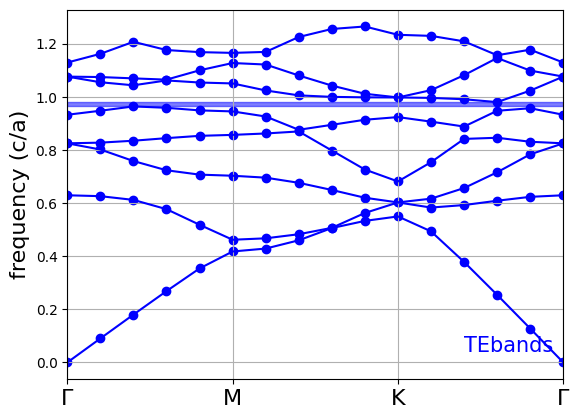

In [12]:
import matplotlib.pyplot as plt
import numpy as np 


fig, ax = plt.subplots()
x = range(len(te_freqs))

for xz, tez in zip(x, te_freqs):
    ax.scatter([xz]*len(tez), tez, color='blue')

ax.plot(te_freqs, color='blue')
#ax.set_ylim([0, 1])
ax.set_xlim([x[0], x[-1]])


for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.5)
        
ax.text(12, 0.04, 'TEbands', color='blue', size=15)

points_in_between = (len(te_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'M', 'K', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)

plt.show()